<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [137]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [138]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [139]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [140]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [141]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [142]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [144]:
df = pd.read_csv("Weather_Data.csv")

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [145]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
#df = pd.read_csv(filepath)

In [146]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [147]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [148]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [149]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [150]:
df_sydney_processed = df_sydney_processed.astype(float)

In [151]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [152]:
#Enter Your Code and Execute

In [153]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [154]:
#Enter Your Code and Execute

In [155]:
LinearReg = LinearRegression()

# Train the model using the training data
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [156]:
#Enter Your Code and Execute

In [157]:
predictions = LinearReg.predict(x_test)

print(predictions)
print(y_test)

[ 1.32e-01  2.76e-01  9.78e-01  2.87e-01  1.32e-01  4.60e-01  3.57e-01
  8.56e-01  6.75e-01  3.83e-02  4.75e-03  2.81e-01  3.39e-01  7.82e-02
  6.26e-02  5.64e-01 -6.15e-02  5.24e-01  1.54e-01  3.60e-01  6.05e-02
  9.04e-01  4.67e-01  2.03e-01 -7.11e-02  3.84e-01  5.36e-01 -2.29e-02
  6.40e-01 -9.56e-02  3.78e-01  1.20e-01 -1.81e-02  5.53e-02  5.64e-01
  1.06e+00 -6.74e-03  5.14e-01 -8.83e-02  6.92e-02  2.45e-02  8.72e-01
  2.45e-01  3.95e-01  2.68e-01  4.47e-01 -4.75e-02  1.89e-01  7.77e-01
  1.58e-01  3.96e-03 -5.20e-02  2.07e-01 -2.08e-01 -7.61e-02  2.50e-01
  2.79e-01  6.03e-01  6.30e-01  4.91e-01  5.65e-02  1.06e-01  6.70e-01
  7.65e-01  9.85e-02 -6.33e-02  4.14e-01  7.25e-02  2.50e-01  2.56e-01
  3.78e-02 -6.89e-02  3.48e-01  1.73e-01  4.15e-01 -7.25e-02  3.41e-01
  1.87e-01 -1.55e-01  8.00e-01  2.32e-01  2.37e-01  2.56e-01  1.03e-01
  6.21e-01  1.30e-01  3.71e-01  4.83e-01  3.08e-01  1.19e-01  5.48e-02
  1.13e-01 -1.62e-01 -1.58e-01  7.29e-02  7.76e-01  8.43e-02  6.43e-01
  1.22

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [158]:
#Enter Your Code and Execute

In [159]:
LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions - y_test) ** 2)
LinearRegression_R2 = r2_score(y_test , predictions)

print(LinearRegression_MAE)
print(LinearRegression_MSE)
print(LinearRegression_R2)

0.256318933909176
0.1157209828234031
0.4271301272061002


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [160]:
#Enter Your Code and Execute

In [161]:
# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})

print(report)

  Metric     Value
0    MAE  0.256319
1    MSE  0.115721
2     R2  0.427130


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [162]:
#Enter Your Code and Execute

In [163]:
KNN = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training data
KNN.fit(x_train, y_train)

print(KNN)

KNeighborsClassifier(n_neighbors=4)


#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [164]:
#Enter Your Code and Execute

In [165]:
predictions = KNN.predict(x_test)

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [166]:
#Enter Your Code and Execute

In [167]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Value': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})

print(report)

           Metric     Value
0  Accuracy Score  0.818321
1   Jaccard Index  0.425121
2        F1 Score  0.596610


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [168]:
#Enter Your Code and Execute

In [169]:
# Create the Decision Tree model
Tree = DecisionTreeClassifier(random_state=10)  # You can set a random_state for reproducibility

# Train the model using the training data
Tree.fit(x_train, y_train)

print(Tree)

DecisionTreeClassifier(random_state=10)


#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [170]:
#Enter Your Code and Execute

In [171]:
predictions = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [172]:
#Enter Your Code and Execute

In [173]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Value': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
})

print(report)

           Metric     Value
0  Accuracy Score  0.754198
1   Jaccard Index  0.399254
2        F1 Score  0.570667


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [174]:
#Enter Your Code and Execute

In [175]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [176]:
#Enter Your Code and Execute

In [177]:
LR = LogisticRegression(solver='liblinear', random_state=1)

# Train the model using the training data
LR.fit(x_train, y_train)

print(LR)

LogisticRegression(random_state=1, solver='liblinear')


#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [178]:
#Enter Your Code and Execute

In [179]:
predictions = LR.predict(x_test)

In [180]:
predict_proba = LR.predict_proba(x_test)

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [181]:
#Enter Your Code and Execute

           Metric     Value
0  Accuracy Score  0.838168
1   Jaccard Index  0.518182
2        F1 Score  0.357721
3        Log Loss  0.357721
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       471
         1.0       0.76      0.62      0.68       184

    accuracy                           0.84       655
   macro avg       0.81      0.77      0.79       655
weighted avg       0.83      0.84      0.83       655

Confusion matrix, without normalization
[[435  36]
 [ 70 114]]


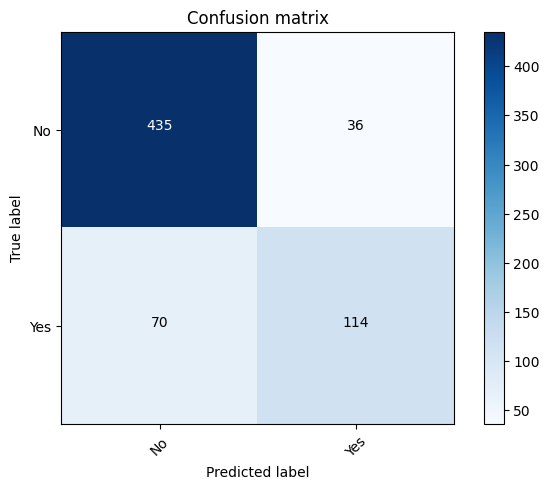

In [182]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score', 'Log Loss'],
    'Value': [LR_Accuracy_Score, LR_JaccardIndex, LR_Log_Loss, LR_Log_Loss]
})

print(report)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'],normalize= False,  title='Confusion matrix')

### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [95]:
#Enter Your Code and Execute

In [183]:
SVM = svm.SVC(kernel='poly', degree=67)

# Train the model using the training data
SVM.fit(x_train, y_train)

print(SVM)

SVC(degree=67, kernel='poly')


#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [184]:
#Enter Your Code and Execute
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
3066,18.7,35.7,0.2,6.0,9.8,57.0,13.0,17.0,44.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2456,15.0,24.8,22.4,3.4,9.7,37.0,19.0,20.0,72.0,53.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1629,8.5,16.0,3.4,2.0,4.3,74.0,35.0,22.0,84.0,87.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
838,11.7,19.9,1.6,1.4,4.6,41.0,15.0,7.0,92.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2506,7.9,19.3,2.2,4.0,10.1,46.0,28.0,20.0,49.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,12.2,19.9,0.0,4.2,8.2,43.0,9.0,28.0,53.0,57.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1725,20.1,28.7,0.2,4.2,10.7,31.0,11.0,20.0,70.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1158,11.6,15.7,18.2,4.8,0.3,57.0,28.0,35.0,89.0,67.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1661,16.9,23.9,0.0,9.8,9.9,57.0,19.0,28.0,60.0,51.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [185]:
predictions = SVM.predict(x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


           Metric     Value
0  Accuracy Score  0.825954
1   Jaccard Index  0.421320
2        F1 Score  0.592857
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       471
         1.0       0.86      0.45      0.59       184

    accuracy                           0.83       655
   macro avg       0.84      0.71      0.74       655
weighted avg       0.83      0.83      0.81       655

Confusion matrix, without normalization
[[458  13]
 [101  83]]


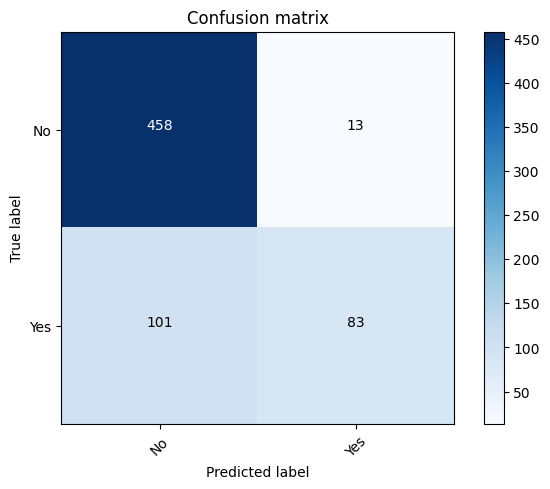

In [186]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Value': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
})

print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No','Yes'],normalize= False,  title='Confusion matrix')

### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [195]:
LinearRegression_MAE = 0.256319
LinearRegression_MSE = 0.115721
LinearRegression_R2 = 0.427130
KNN_Accuracy_Score =  0.818321
KNN_JaccardIndex =  0.425121
KNN_F1_Score = 0.596610
Tree_Accuracy_Score = 0.754198
Tree_JaccardIndex = 0.399254
Tree_F1_Score = 0.570667
LR_Accuracy_Score = 0.838168
LR_JaccardIndex = 0.518182
LR_F1_Score = 0.357721
LR_LogLoss = 0.357721
SVM_Accuracy_Score = 0.825954
SVM_JaccardIndex = 0.421320
SVM_F1_Score = 0.592857

metrics = pd.DataFrame({
    'Model': ['Linear Regression','Linear Regression','Linear Regression','KNN','KNN','KNN','Decision Tree','Decision Tree','Decision Tree','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','SVM','SVM','SVM'],
    'Metric': ['Mean Absolute Error','Mean Squared Error','R2-Score','Accuracy','Jaccard Index','F1-Score','Accuracy','Jaccard Index','F1-Score','Accuracy','Jaccard Index','F1-Score','LogLoss','Accuracy','Jaccard Index','F1-Score'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2, KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score, Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_LogLoss, SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
    })

print(metrics)

                  Model               Metric     Value
0     Linear Regression  Mean Absolute Error  0.256319
1     Linear Regression   Mean Squared Error  0.115721
2     Linear Regression             R2-Score  0.427130
3                   KNN             Accuracy  0.818321
4                   KNN        Jaccard Index  0.425121
5                   KNN             F1-Score  0.596610
6         Decision Tree             Accuracy  0.754198
7         Decision Tree        Jaccard Index  0.399254
8         Decision Tree             F1-Score  0.570667
9   Logistic Regression             Accuracy  0.838168
10  Logistic Regression        Jaccard Index  0.518182
11  Logistic Regression             F1-Score  0.357721
12  Logistic Regression              LogLoss  0.357721
13                  SVM             Accuracy  0.825954
14                  SVM        Jaccard Index  0.421320
15                  SVM             F1-Score  0.592857


In [189]:
# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Value': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
})

print(report)



           Metric     Value
0  Accuracy Score  0.825954
1   Jaccard Index  0.421320
2        F1 Score  0.592857


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
